In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
from matplotlib.pyplot import specgram
import matplotlib.pyplot as plt
import pickle
import gzip
%matplotlib inline

# Reading dataset

In [2]:
with gzip.open('../cache/dataset_fixed.pkl.gz', 'rb') as f:
    X, y = pickle.load(f)

In [3]:
len(X), len(y)

(5814, 5814)

In [4]:
a = [x for x, y_ in zip(X, y) if y_ == 0]
b = [x for x, y_ in zip(X, y) if y_ == 1]
c = [x for x, y_ in zip(X, y) if y_ == 2]

In [5]:
len(a), len(b), len(c)

(1647, 291, 3876)

In [10]:
from IPython.display import Audio, display

In [14]:
# wid = Audio(a[11], rate=22050)
wids = [Audio(a[i], rate=22050) for i in np.random.randint(0, len(a), 10)]

In [16]:
for w in wids:
    display(w)

In [14]:
# wid = Audio(a[11], rate=22050)
wids = [Audio(a[i], rate=22050) for i in np.random.randint(0, len(a), 10)]

In [16]:
for w in wids:
    display(w)

In [19]:
wids = [Audio(c[i], rate=22050) for i in np.random.randint(0, len(c), 10)]

In [20]:
for w in wids:
    display(w)

# Plots

In [21]:
def plot_waves(sound_names, raw_sounds):
    i = 1
    l = len(raw_sounds)
    
    for n, f in zip(sound_names, raw_sounds):
        fig = plt.figure(figsize=(8, 5))
        librosa.display.waveplot(np.array(f), sr=22050)
        plt.title(n.title())
        i += 1
    plt.show()
    

def plot_specgram(sound_names, raw_sounds):
    i = 1
    l = len(raw_sounds)
    
    for n, f in zip(sound_names, raw_sounds):
        fig = plt.figure(figsize=(8, 5))
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.show()

    
def plot_log_power_specgram(sound_names, raw_sounds):
    i = 1
    l = len(raw_sounds)
    
    for n, f in zip(sound_names, raw_sounds):
        fig = plt.figure(figsize=(8, 5))
        D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D, x_axis='time', y_axis='log')
        plt.title(n.title())
        i += 1
    plt.show()

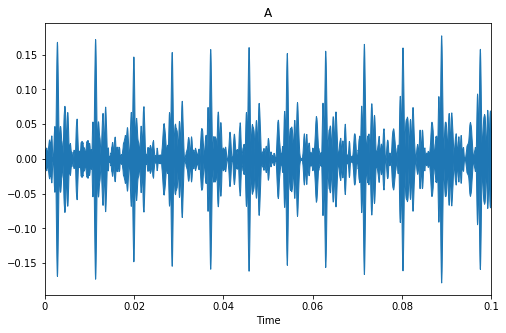

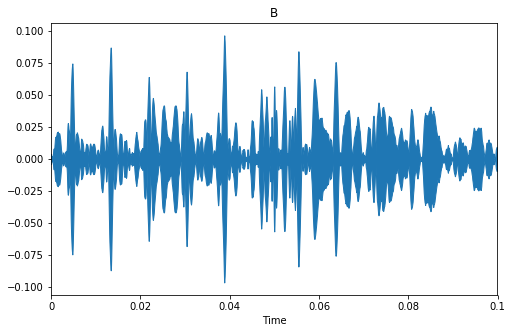

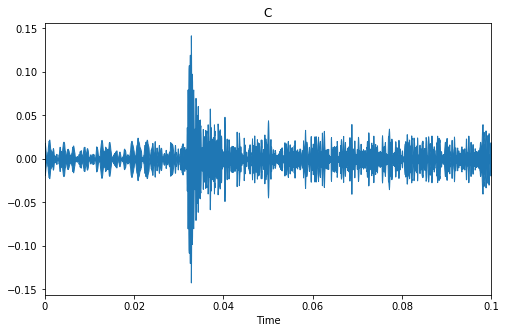

In [22]:
plot_waves(['a', 'b', 'c'], [a[0], b[0], c[1]])

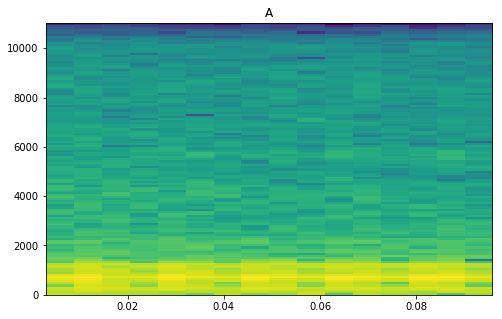

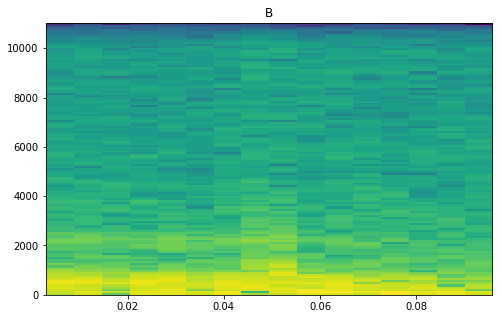

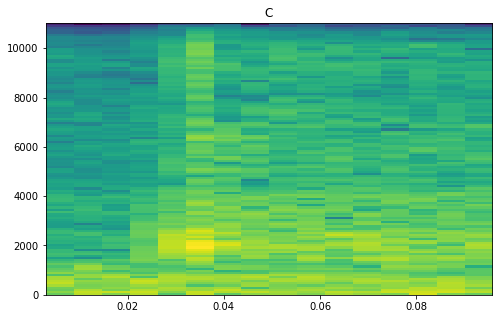

In [23]:
plot_specgram(['a', 'b', 'c'], [a[0], b[0], c[1]])

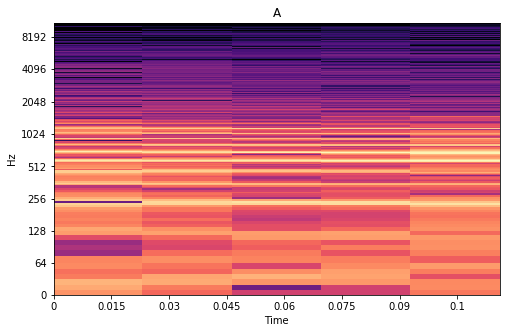

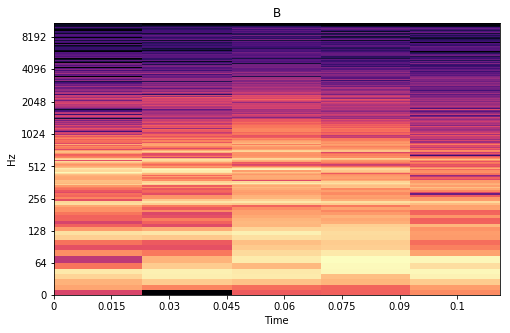

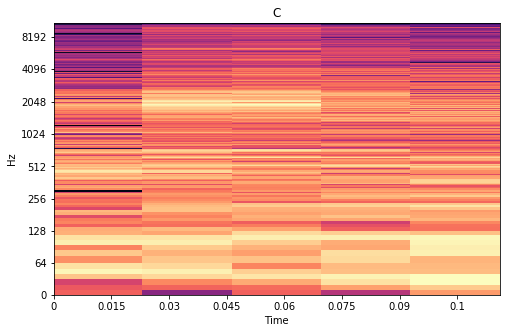

In [24]:
plot_log_power_specgram(['a', 'b', 'c'], [a[0], b[0], c[1]])

# Features

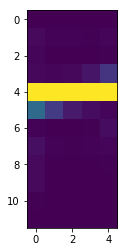

In [28]:
plt.imshow(np.square(librosa.feature.chroma_stft(a[1])))

In [29]:
librosa.feature.melspectrogram(a[1]).shape

(128, 5)

In [30]:
librosa.feature.spectral_contrast(a[1]).shape

(7, 5)

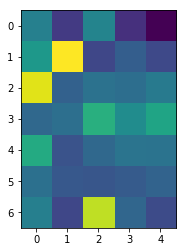

In [31]:
plt.imshow(np.square(librosa.feature.spectral_contrast(a[1])))

In [32]:
librosa.effects.harmonic(a[0]).shape

(2205,)

In [33]:
librosa.feature.tonnetz(librosa.effects.harmonic(a[1])).shape

(6, 5)

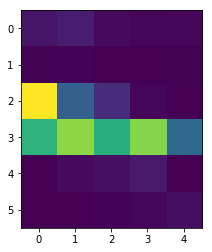

In [34]:
plt.imshow(np.square(librosa.feature.tonnetz(librosa.effects.harmonic(a[1]))))

In [183]:
# def extract_feature(x):
#     features = {}
#     stft = np.abs(librosa.stft(x))
#     features['stft_min'] = stft.min()
#     features['stft_max'] = stft.max()
#     features['stft_mean'] = stft.mean()
#     features['stft_std'] = stft.std()
    
#     mfccs = np.mean(librosa.feature.mfcc(a[1], n_mfcc=5).T, axis=0)
#     features['mfccs_0'] = mfccs[0]
#     features['mfccs_1'] = mfccs[1]
#     features['mfccs_2'] = mfccs[2]
#     features['mfccs_3'] = mfccs[3]
#     features['mfccs_4'] = mfccs[4]

#     chrome = librosa.feature.chroma_stft(S=stft)
#     features['chrome_min'] = chrome.min()
#     features['chrome_max'] = chrome.max()
#     features['chrome_mean'] = chrome.mean()
#     features['chrome_std'] = chrome.std()
    
#     mel = librosa.feature.melspectrogram(x)
#     features['mel_min'] = mel.min()
#     features['mel_max'] = mel.max()
#     features['mel_mean'] = mel.mean()
#     features['mel_std'] = mel.std()
    
#     contrast = librosa.feature.spectral_contrast(x)
#     features['contrast_min'] = contrast.min()
#     features['contrast_max'] = contrast.max()
#     features['contrast_mean'] = contrast.mean()
#     features['contrast_std'] = contrast.std()
    
#     tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(x))
#     features['tonnetz_min'] = tonnetz.min()
#     features['tonnetz_max'] = tonnetz.max()
#     features['tonnetz_mean'] = tonnetz.mean()
#     features['tonnetz_std'] = tonnetz.std()
#     return features

In [37]:
def extract_feature(x, sample_rate=22050):
    stft = np.abs(librosa.stft(x))
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(x, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(x),
    sr=sample_rate).T,axis=0)
    return np.hstack([mfccs,chroma,mel,contrast,tonnetz])

In [38]:
X_df = pd.DataFrame([extract_feature(x) for x in X])

/home/evgeny/miniconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [39]:
X_df.shape

(5814, 193)

In [40]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-292.521254,194.619884,-1.119858,-8.060714,-30.097258,1.144396,-0.127159,9.228069,-2.752712,0.870406,...,23.829195,19.337276,19.239699,21.609048,-0.028255,0.012601,-0.050682,-0.166285,-0.029621,-0.021921
1,-385.497561,135.966238,1.121756,22.540087,-3.201158,20.987448,7.777071,0.503438,-0.807442,13.516233,...,16.856626,17.584428,18.970646,21.545146,0.034881,-0.015111,-0.058232,0.059270,0.010523,-0.024072
2,-259.979357,89.553355,-33.965021,27.793569,29.874775,-1.040923,-19.556216,1.783546,4.718682,8.460262,...,17.242865,19.288303,19.155786,25.004095,0.013040,0.005373,-0.035431,0.046125,0.018162,0.012792
3,-277.271777,193.456770,-2.311730,0.323695,-20.999814,-5.671364,-1.155615,11.253762,6.656929,5.733717,...,22.780128,20.991252,19.051728,21.168467,0.037324,0.009300,-0.079976,0.162446,0.025571,0.022086
4,-364.343514,115.643956,-9.706023,27.659145,5.423416,10.333304,7.867374,11.459011,0.369716,8.261029,...,16.576780,16.481336,17.849847,22.491140,0.071186,0.115883,-0.120295,-0.005157,0.003075,0.002934


In [41]:
from pandas_profiling import ProfileReport

/home/evgeny/miniconda3/lib/python3.6/site-packages/pandas_profiling/base.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/evgeny/miniconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/evgeny/miniconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/evgeny/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/evgeny/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/evgeny/miniconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, 

In [42]:
rep = ProfileReport(X_df)

In [43]:
rep.get_rejected_variables()

[58, 131, 158, 160, 161, 167, 179]

In [44]:
X_df = X_df[X_df.columns[X_df.columns.isin(set(X_df.columns) -\
                                           set(rep.get_rejected_variables()))]]

## Models 

In [45]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
model = LGBMClassifier(n_estimators=100)

In [54]:
score = cross_val_score(model, X_df, y, cv=5)

/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)
/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/

In [55]:
score.mean()

0.91056845409497811

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2)

In [57]:
X_train.shape, X_test.shape

((4651, 186), (1163, 186))

In [58]:
model.fit(X_train, y_train)

/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)


LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.1,
        max_bin=255, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [59]:
pr = model.predict(X_test)

In [60]:
accuracy_score(y_test, pr)

0.91057609630266556

In [61]:
cm = confusion_matrix(y_test, pr)

In [62]:
cm

array([[306,   1,  38],
       [  2,  42,  15],
       [ 40,   8, 711]])

In [67]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test, pr))

             precision    recall  f1-score   support

          0       0.88      0.89      0.88       345
          1       0.82      0.71      0.76        59
          2       0.93      0.94      0.93       759

avg / total       0.91      0.91      0.91      1163



In [63]:
sorted(zip(X_df.columns, model.feature_importance()), key=lambda x: -x[1])

/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/sklearn.py:588: LGBMDeprecationWarning: The `feature_importance()` method is deprecated and will be removed in 2.0.12 version. Please use attribute `feature_importances_` instead.
  'Please use attribute `feature_importances_` instead.', LGBMDeprecationWarning)


[(12, 183),
 (61, 174),
 (11, 166),
 (56, 166),
 (7, 147),
 (14, 139),
 (62, 138),
 (3, 132),
 (51, 132),
 (6, 131),
 (55, 127),
 (57, 127),
 (10, 125),
 (8, 120),
 (50, 116),
 (2, 111),
 (9, 104),
 (22, 102),
 (20, 100),
 (4, 98),
 (65, 98),
 (16, 97),
 (66, 93),
 (18, 92),
 (64, 90),
 (1, 89),
 (44, 88),
 (30, 86),
 (23, 84),
 (78, 81),
 (183, 78),
 (15, 76),
 (17, 73),
 (29, 72),
 (59, 70),
 (24, 69),
 (48, 69),
 (75, 69),
 (111, 68),
 (45, 67),
 (26, 66),
 (82, 65),
 (32, 64),
 (70, 64),
 (37, 62),
 (191, 62),
 (49, 61),
 (54, 61),
 (133, 61),
 (47, 60),
 (33, 58),
 (81, 58),
 (184, 57),
 (97, 56),
 (94, 55),
 (96, 55),
 (36, 54),
 (76, 53),
 (99, 53),
 (5, 52),
 (69, 51),
 (79, 51),
 (39, 50),
 (42, 50),
 (105, 50),
 (67, 49),
 (46, 48),
 (28, 47),
 (40, 47),
 (72, 47),
 (88, 47),
 (27, 46),
 (13, 44),
 (31, 44),
 (95, 44),
 (98, 44),
 (190, 44),
 (21, 42),
 (38, 42),
 (43, 42),
 (53, 42),
 (108, 42),
 (186, 42),
 (91, 41),
 (110, 41),
 (182, 41),
 (187, 41),
 (34, 40),
 (152, 40)

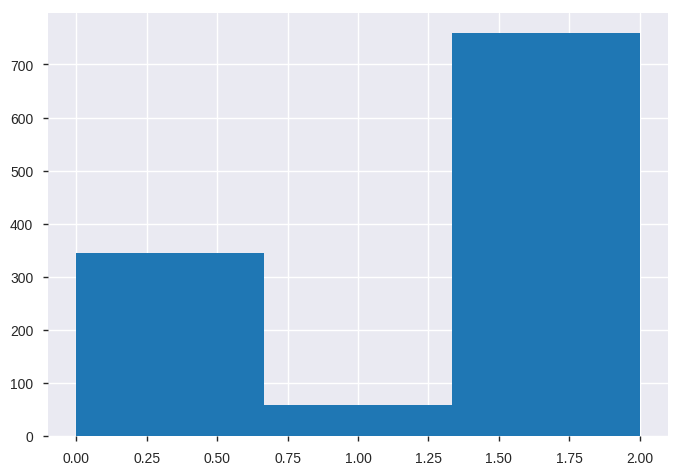

In [64]:
plt.hist(y_test, bins=3);

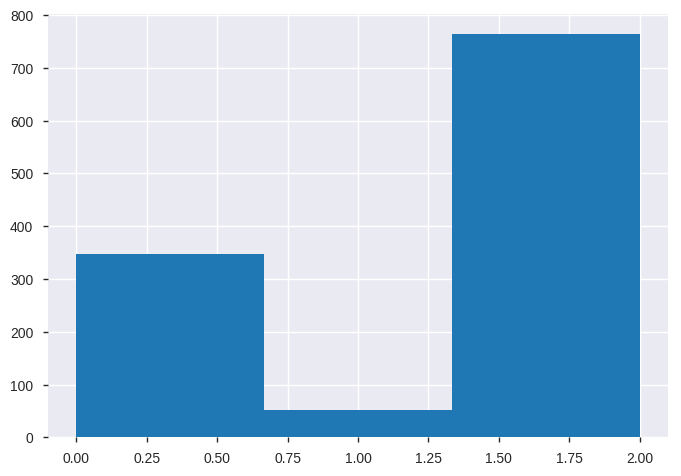

In [65]:
plt.hist(pr, bins=3);

In [66]:
accuracy_score(y_test, [2] * len(y_test))

0.65262252794496989

# Testing on new data

In [70]:
def get_praat_annotations(paths):
    dfs = []
    for path in paths:
        with open(path) as f:
            annotation = [l.strip() for l in f.readlines()]
            
        indxs = [i for i, l in enumerate(annotation) if l == '"IntervalTier"']
        annotation = annotation[indxs[0] + 5:indxs[1] if len(indxs) > 1\
                                else len(annotation)]
        annotation_dicts = []

        for s, e, l in zip(annotation[0::3], annotation[1::3], annotation[2::3]):
            annotation_dicts.append({
                'start': float(s),
                'finish': float(e),
                'label': l.replace('"', ''),
                'length': float(e) - float(s)
            })
        df = pd.DataFrame(annotation_dicts)
        dfs.append(df)
    return dfs

test_annotation = get_praat_annotations(['../annotations/arhis1.TextGrid'])

In [71]:
test_audio, sr = librosa.load('../audio/arhis1.m4a')

In [76]:
interval_time = 0.1
interval_step = 0.05

interval_len, step_len = librosa.time_to_samples(interval_time)[0],\
                 librosa.time_to_samples(interval_step)[0]

In [77]:
interval, step

(2205, 1102)

In [78]:
def get_label_data(annotation, audio, labels, sr=22050):
    # по дефолту все 2го класса
    data = pd.Series(index=np.arange(0, len(audio) - interval_len, step_len), data=2)
    label_map = {'a': 0, 'b': 1, 'c': 2}
    for label in labels:
        l = label_map[label]
        start_samples_indxs = librosa.time_to_samples(annotation[annotation.label ==\
                                                              label].start.values, sr)
        finish_samples_indxs = librosa.time_to_samples(annotation[annotation.label ==\
                                                               label].finish.values, sr)
        for s, f in zip(start_samples_indxs, finish_samples_indxs):
            s = int(np.round(s / step_len)) * step_len
            f = (int(np.round(f / step_len)) - 2) * step_len
            # вычитаем 2 потому что f - это конец интервала, в Series мы заносим метку для 
            # начала  интервала, длина интервала 2 * step, поэтому нужно вычесть 2
            data[(data.index >= s) & (data.index <= f)] = l
    return data

In [81]:
test_data = get_label_data(test_annotation[0], test_audio, ['a', 'b'])

In [87]:
test_data.shape

(6346,)

In [83]:
test_data.value_counts()

2    6002
0     344
dtype: int64

In [84]:
test_samples = [test_audio[i:i + interval_len] for i in test_data.index]

In [88]:
test_samples[0].shape

(2205,)

In [85]:
len(test_samples)

6346

In [89]:
test_features = pd.DataFrame([extract_feature(x) for x in test_samples])

/home/evgeny/miniconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [90]:
test_features = test_features[X_df.columns]

In [91]:
test_predict = model.predict(test_features)

In [94]:
accuracy_score(test_data.values, test_predict)

0.93838638512448791

In [95]:
accuracy_score(test_data.values, [2] * len(test_predict))

0.94579262527576424

In [97]:
print(classification_report(test_data.values, test_predict))

             precision    recall  f1-score   support

          0       0.60      0.30      0.40       344
          1       0.00      0.00      0.00         0
          2       0.96      0.98      0.97      6002

avg / total       0.94      0.94      0.94      6346



/home/evgeny/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


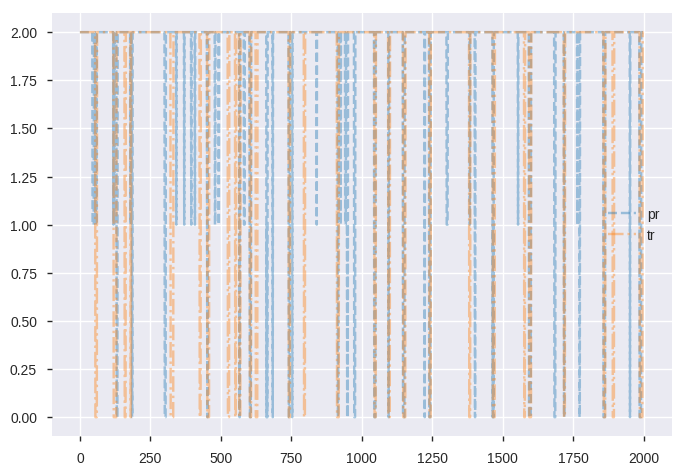

In [109]:
plt.plot(test_predict[:2000], '--', label='pr', alpha=0.4)
plt.plot(test_data.iloc[:2000].values, '-.', label='tr', alpha=0.4)
plt.legend()

## Отображение результата

In [112]:
from PIL import Image
import os
import shutil

In [113]:
# os.rmdir('../cache/imgs/')
shutil.rmtree('../cache/imgs/')

In [114]:
os.mkdir('../cache/imgs')

In [115]:
for i, (r, t) in enumerate(zip(test_predict, test_data.values)):
    im_r = np.zeros((32, 64, 3), dtype='uint8')
    if r == 0:
        im_r[:,:,0] = 255
    elif r == 1:
        im_r[...,2] = 255
    else:
        im_r[...,1] = 255
        
    im_t = np.zeros((32, 64, 3), dtype='uint8')
    if t == 0:
        im_t[:,:,0] = 255
    elif t == 1:
        im_t[...,2] = 255
    else:
        im_t[...,1] = 255
        
    im = np.vstack((im_r, im_t))
    im = Image.fromarray(im)
    im.save('../cache/imgs/test_{:04d}.png'.format(i + 2))
im.save('../cache/imgs/test_{:04d}.png'.format(0))
im.save('../cache/imgs/test_{:04d}.png'.format(1))

In [116]:
os.system('ffmpeg -r 20 -i ../cache/imgs/test_%04d.png -i ../audio/arhis1.mp3 -vcodec mpeg4 -y ../cache/a.mp4')

0